## 广度优先搜索

广度优先搜索可以找到两者之间的最短的距离（如何算作是最短的含义有着很多）

## 一个简单的例子

从双子峰前往金门大桥：
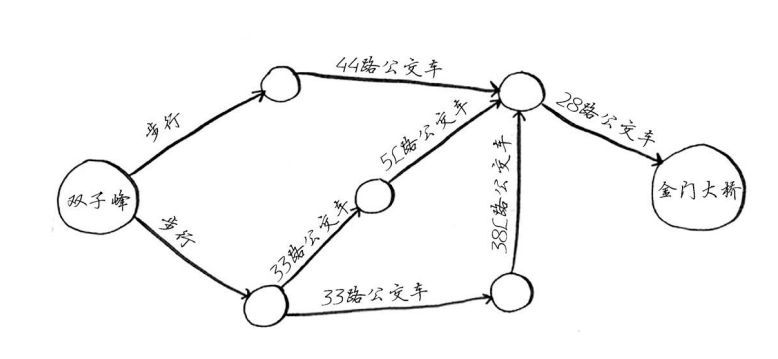

目标：找到换乘最少的乘车路线。

第一步能够到达的地方：
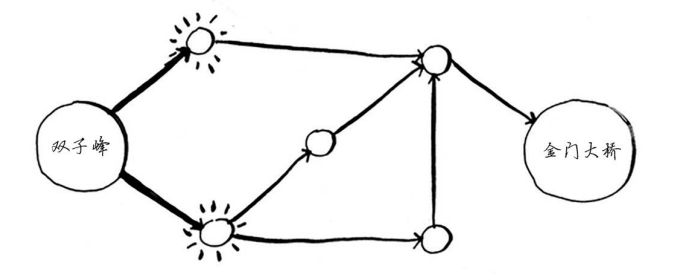

第二步能够到达的地方：
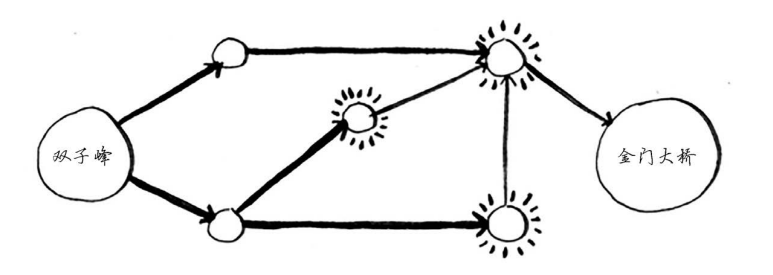

第三步能够到达的地方：
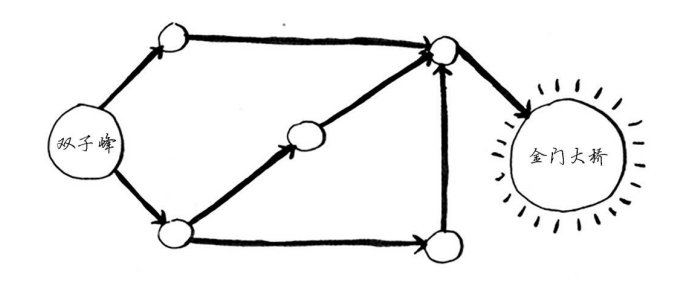

可以发现这个路径可以三步到达金门大桥：
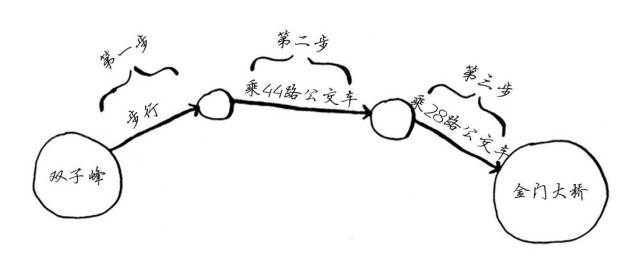

虽然其他的路线也能够达到金门大桥，但是需要四步，所以这个算法会选择只需要三步的路径，这个路径也就是最短路径，而这种问题也被称之为叫做最短路径问题（shorterest-path problem）。

## 图是什么

图模拟一组连接假设你与朋友玩牌，并要模拟谁欠谁钱，可像下面这样指出Alex欠Rama钱。
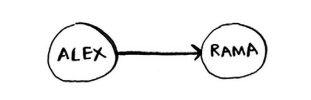

而完整的欠钱图可能是这样的：
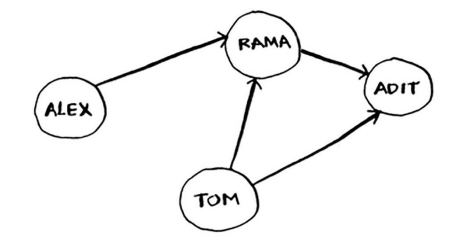

图由节点和边组成。一个节点可能与众多节点直接相连，这些节点被称为邻居

## 回到广度优先搜索

广度优先搜索是一种用于图的查找算法，可帮助回答两类问题：
1. 第一类问题：从节点A出发，有前往节点B的路径吗？
2. 第二类问题：从节点A出发，前往节点B的哪条路径最短？

从双子峰到金门大桥的最短路径便是第二类问题。

我们现在可以尝试着用广度优先搜索来解决第一类问题：有路径吗？

假设你经营者一个芒果农场，需要寻找一个芒果销售商，那么你将会现在朋友中查找：
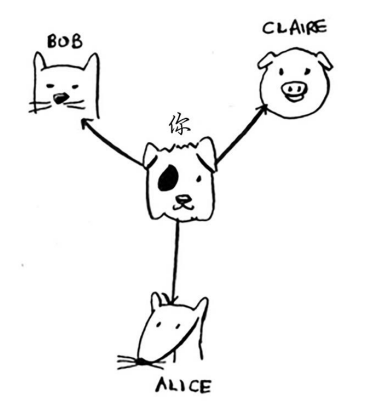

那么我们而已先将你的朋友创建一个朋友名单，然后检查这个名单中是否有芒果销售商：
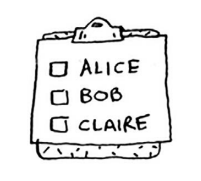

检查：
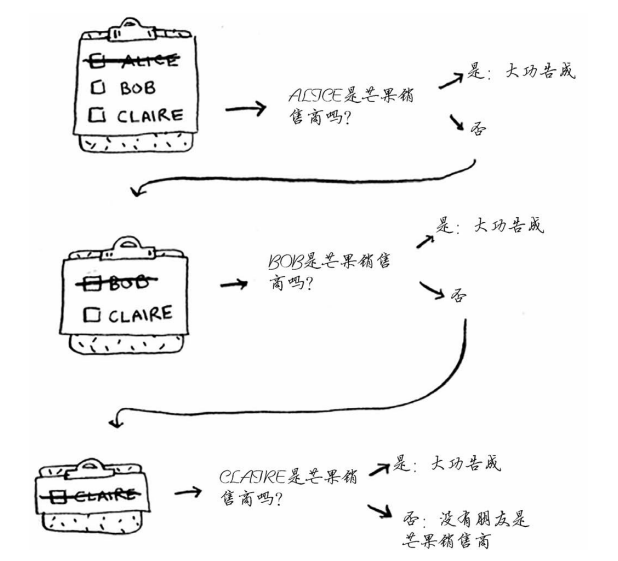

但是如果你的朋友当中没有芒果销售商，那么你需要做的就是在你的朋友的朋友中查找：
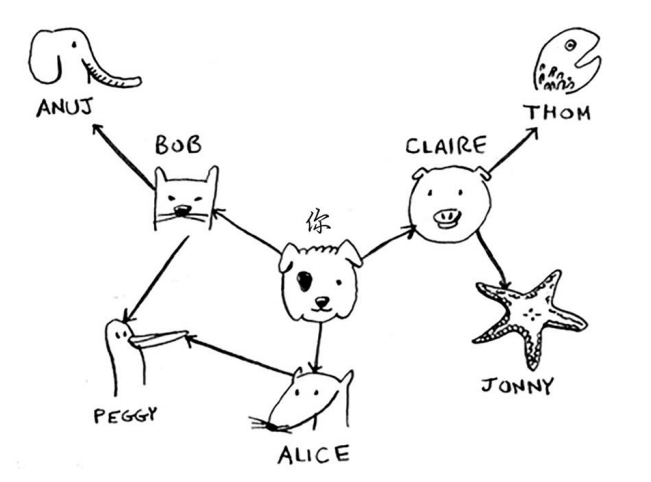

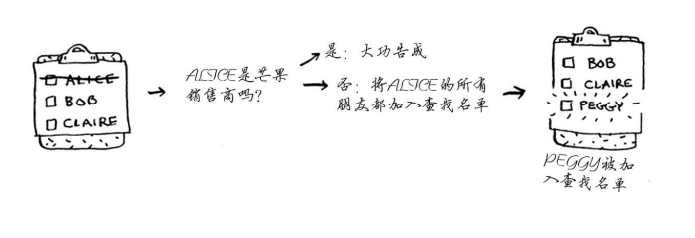

通过这个思路，你不仅仅可以在你的朋友中查找，你还可以在你的朋友的朋友中查找，这种算法将会搜遍你的整个人机关系网，直到找到芒果销售商。

接着我们需要思考的问题是：谁是关系最近的芒果销售商。
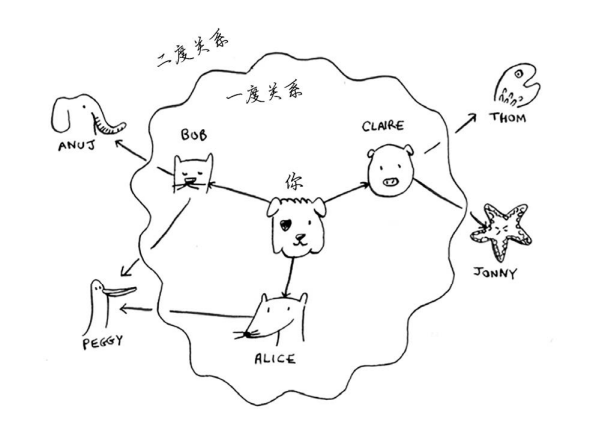

我们要现在一度关系当中查找是否存在着芒果销售商，如果不存在，再考虑二度关系，然后才是三度关系；我们不需要的是发现一度关系中的某一个人不是芒果销售商，就急急忙忙的通过他来查找二度关系中是否存在着芒果销售商。

## 队列

队列的工作原理语现实生活种的队列完全相同，假设人们在排队，排在前面的人将会先上车：
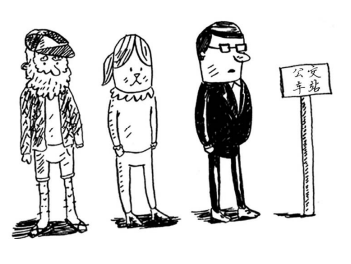

队列的原理也是如此：
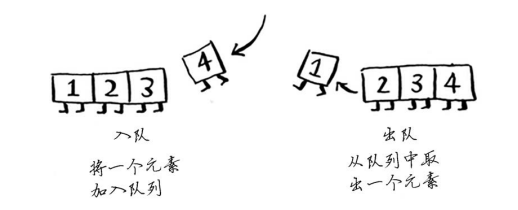

如果你将两个元素加入队列，先加入的元素将在后加入的元素之前出队，因此你可以使用队列来表示查找名单，这样一来先加入的人将会先出队并且先被检查。

队列是一种先进先出（First In First Out，FIFO）的数据结构，而栈是一种后进先出（Last In First Out，LIFO）的数据结构。

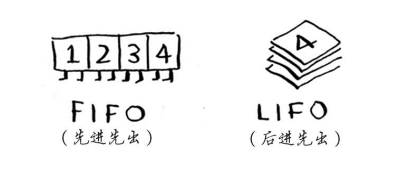

## 实现图

首先，需要使用代码来实现图。图由多个节点组成。

每个节点都与邻近节点相连，如果表示类似于“你→Bob”这样的关系呢？好在你知道的一种结构让你能够表示这种关系，它就是散列表！

代码如下所示：

In [1]:
graph = {}
graph["you"] = ["alice", "bob", "claire"]

我们用dictionary来生成了一个名为graph的空字典，接着我们将"you"映射到了一个数组，因此graph["you"]是一个数组，其中包含了"you"的所有邻居。

接着我们可以将所有的关系都映射进来：
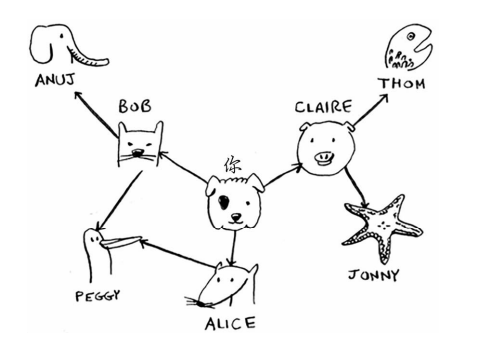

Python代码如下所示：

In [2]:
graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "jonny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["jonny"] = []

需要注意的是：对于字典而已，键值对的添加顺序是不重要的。

## 实现算法

这种算法的工作原理如下所示：

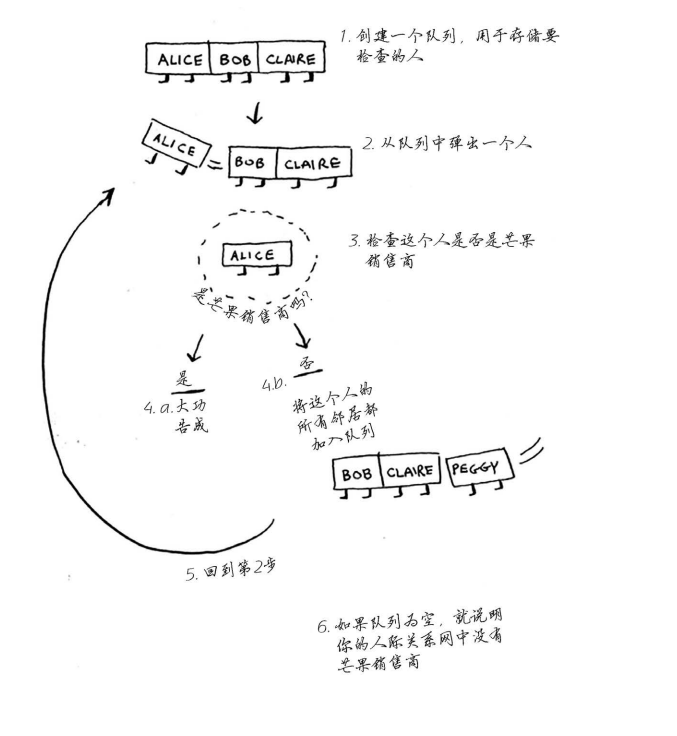

我们首先创建一个队列，在python语言中，可以使用deque来创建一个双端队列：

In [4]:
from collections import deque  # 从collection库中导入 deque
search_queue = deque()   # 创建一个队列
search_queue += graph["you"]  # 将you的邻居都加入到这个搜索队列中

graph["you"]是一个数组，其中包含你的所有邻居，比如说["alice", "bob", "claire"]，这些邻居也会被加入到搜索队列种。

In [ ]:
# 其他的代码
while search_queue:  # 只要队列不为空，则继续运行下去
    person = search_queue.popleft()   # 就从队列中取出来第一个人
    if person_is_seller(person):
        print (person + " is a mango seller!")  # 这个人是芒果经销商
        return True
    else:
        search_queue += graph[person]  # 如果不是，则将这个人的所有朋友都加入进来
return False  # 如果遍历了都没有，那么返回False

接着是我们给出判断一个人是否是芒果经销商的判断函数，这里我们假设名字是m结尾的就是芒果经销商：

In [5]:
def person_is_seller(name):
    return name[-1] == 'm' 

这个算法是会不断的运行的，直到满足以下条件中的一个：
1. 找到一位芒果经销商
2. 队列变成空的

Peggy既是Alice的朋友，也是Bob的朋友，那么Peggy将会被加入队列两次：一次是在添加Alice的朋友的时候，另一次是在添加Bob的朋友的时候。

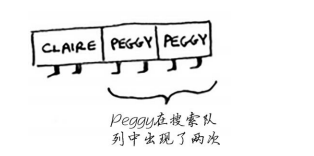

但是实际上我们只需要检查Peggy一次，如果Peggy已经被检查过了，那么我们将会不再检查Peggy，否则的话我们将会做无用功，而且这将会导致无限循环。

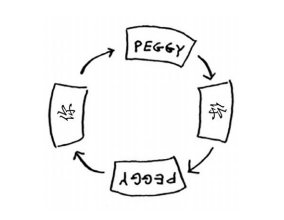

因此，我们需要确定一个人是否被检查过了。

In [6]:
searched = []

最终代码如下所示：

In [7]:
def search(name):
    
    search_queue = deque()   # 创建一个用来搜索的双端队列
    search_queue += graph[name]  # 将名字所对应的人加入到这个队列中（默认是右边）
    searched = []   # 一个列表，用来存储那些已经被查找过的人
    while search_queue:   # 当需要被检查的队列不为空的时候
        person = search_queue.popleft()  # 将最左端的人弹出来，相当于实现了先入先出
        if not person in searched:  # 如果这个人没有被检查过，则进行检查
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                search_queue += graph[person]
                searched.append(person)
    return False

search("you")

thom is a mango seller!


True